In [1]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,"../")
import mplhep as hep
import pickle
import glob
import ROOT as rt
import coffea
import awkward as ak
from coffea import hist, processor
from coffea.nanoevents.methods import candidate
from coffea.nanoevents.methods import vector
import os

Warning in <TInterpreter::ReadRootmapFile>: class  HepMC::FourVector found in libSimDataFormatsGeneratorProducts.so  is already in libHepMC3rootIO.so 


Welcome to JupyROOT 6.28/00


/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/sft.cern.ch/lcg/views/LCG_103/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  r

In [2]:
MC_kFactors = {"2022":0.9202108866645403,"2022EE":0.9205275233052539,"2023":0.9287192347533128,"2023BPix":0.938125553192627,"2024":0.9070469152942339}

In [3]:
C = rt.TCanvas("c","c", 1000,800)
leg = rt.TLegend(0.7, 0.15, 0.9, 0.3)

In [4]:

Muon_pT_noClusters_2022_file = rt.TFile.Open("2022_Data_MC_Comp_noClusters_correctSFs/probe_pT/probe_pT.root", "READ")
Muon_pT_noClusters_2022_file_CSC = rt.TFile.Open("2022_Data_MC_Comp_finalzedSelections_highMET_fixedHotspotTrue_correctSFs/probe_pT_noCuts/probe_pT_noCuts.root")
Muon_pT_noClusters_2022_file_DT = rt.TFile.Open("2022_DT_Data_MC_Comp_finalzedSelections_highMET_DTs/probe_pT_noCuts/probe_pT_noCuts.root")

Data_hist_2022 = Muon_pT_noClusters_2022_file.Get("Data_hist")
CSC_Data_hist_2022 = Muon_pT_noClusters_2022_file_CSC.Get("Data_hist")
CSC_Data_hist_2022.Scale(1/MC_kFactors["2022"])
DT_Data_hist_2022 = Muon_pT_noClusters_2022_file_DT.Get("Data_hist")
DT_Data_hist_2022.Scale(1/MC_kFactors["2022"])

CSC_Data_hist_2022.Add(DT_Data_hist_2022)

Data_2022_Eff = rt.TEfficiency(CSC_Data_hist_2022, Data_hist_2022)
Data_2022_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

Data_2022_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
leg.AddEntry(Data_2022_Eff, "2022 Data", "lep")

MC_hist_2022 = Muon_pT_noClusters_2022_file.Get("MC_hist")
CSC_MC_hist_2022 = Muon_pT_noClusters_2022_file_CSC.Get("MC_hist")
CSC_MC_hist_2022.Scale(1/MC_kFactors["2022"])
DT_MC_hist_2022 = Muon_pT_noClusters_2022_file_DT.Get("MC_hist")
DT_MC_hist_2022.Scale(1/MC_kFactors["2022"])

CSC_MC_hist_2022.Add(DT_MC_hist_2022)

MC_2022_Eff = rt.TEfficiency(CSC_MC_hist_2022, MC_hist_2022)
MC_2022_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

MC_2022_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
MC_2022_Eff.SetLineColor(rt.kRed)
leg.AddEntry(MC_2022_Eff, "2022 MC", "lep")




Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [5]:

Muon_pT_noClusters_2022EE_file = rt.TFile.Open("2022EE_Data_MC_Comp_noClusters_correctSFs/probe_pT/probe_pT.root", "READ")
Muon_pT_noClusters_2022EE_file_CSC = rt.TFile.Open("2022EE_Data_MC_Comp_finalzedSelections_highMET_fixedHotspotTrue_correctSFs/probe_pT_noCuts/probe_pT_noCuts.root")
Muon_pT_noClusters_2022EE_file_DT = rt.TFile.Open("2022EE_DT_Data_MC_Comp_finalzedSelections_highMET_DTs/probe_pT_noCuts/probe_pT_noCuts.root")

Data_hist_2022EE = Muon_pT_noClusters_2022EE_file.Get("Data_hist")
CSC_Data_hist_2022EE = Muon_pT_noClusters_2022EE_file_CSC.Get("Data_hist")
CSC_Data_hist_2022EE.Scale(1/MC_kFactors["2022EE"])
DT_Data_hist_2022EE = Muon_pT_noClusters_2022EE_file_DT.Get("Data_hist")
DT_Data_hist_2022EE.Scale(1/MC_kFactors["2022EE"])

CSC_Data_hist_2022EE.Add(DT_Data_hist_2022EE)

Data_2022EE_Eff = rt.TEfficiency(CSC_Data_hist_2022EE, Data_hist_2022EE)
Data_2022EE_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

Data_2022EE_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
leg.AddEntry(Data_2022EE_Eff, "2022EE Data", "lep")

MC_hist_2022EE = Muon_pT_noClusters_2022EE_file.Get("MC_hist")
CSC_MC_hist_2022EE = Muon_pT_noClusters_2022EE_file_CSC.Get("MC_hist")
CSC_MC_hist_2022EE.Scale(1/MC_kFactors["2022EE"])
DT_MC_hist_2022EE = Muon_pT_noClusters_2022EE_file_DT.Get("MC_hist")
DT_MC_hist_2022.Scale(1/MC_kFactors["2022EE"])

CSC_MC_hist_2022EE.Add(DT_MC_hist_2022EE)

MC_2022EE_Eff = rt.TEfficiency(CSC_MC_hist_2022EE, MC_hist_2022EE)
MC_2022EE_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

MC_2022EE_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
MC_2022EE_Eff.SetLineColor(rt.kRed)
leg.AddEntry(MC_2022EE_Eff, "2022EE MC", "lep")




Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [6]:

Muon_pT_noClusters_2023_file = rt.TFile.Open("2023_Data_MC_Comp_noClusters_correctSFs/probe_pT/probe_pT.root", "READ")
Muon_pT_noClusters_2023_file_CSC = rt.TFile.Open("2023_Data_MC_Comp_finalzedSelections_highMET_fixedHotspotTrue_correctSFs/probe_pT_noCuts/probe_pT_noCuts.root")
Muon_pT_noClusters_2023_file_DT = rt.TFile.Open("2023_DT_Data_MC_Comp_finalzedSelections_highMET_DTs/probe_pT_noCuts/probe_pT_noCuts.root")

Data_hist_2023 = Muon_pT_noClusters_2023_file.Get("Data_hist")
CSC_Data_hist_2023 = Muon_pT_noClusters_2023_file_CSC.Get("Data_hist")
CSC_Data_hist_2023.Scale(1/MC_kFactors["2023"])
DT_Data_hist_2023 = Muon_pT_noClusters_2023_file_DT.Get("Data_hist")
DT_Data_hist_2023.Scale(1/MC_kFactors["2023"])

CSC_Data_hist_2023.Add(DT_Data_hist_2023)

Data_2023_Eff = rt.TEfficiency(CSC_Data_hist_2023, Data_hist_2023)
Data_2023_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

Data_2023_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
leg.AddEntry(Data_2023_Eff, "2023 Data", "lep")

MC_hist_2023 = Muon_pT_noClusters_2023_file.Get("MC_hist")
CSC_MC_hist_2023 = Muon_pT_noClusters_2023_file_CSC.Get("MC_hist")
CSC_MC_hist_2023.Scale(1/MC_kFactors["2023"])
DT_MC_hist_2023 = Muon_pT_noClusters_2023_file_DT.Get("MC_hist")
DT_MC_hist_2023.Scale(1/MC_kFactors["2023"])

CSC_MC_hist_2023.Add(DT_MC_hist_2023)

MC_2023_Eff = rt.TEfficiency(CSC_MC_hist_2023, MC_hist_2023)
MC_2023_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

MC_2023_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
MC_2023_Eff.SetLineColor(rt.kRed)
leg.AddEntry(MC_2023_Eff, "2023 MC", "lep")




Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [7]:

Muon_pT_noClusters_2023BPix_file = rt.TFile.Open("2023BPix_Data_MC_Comp_noClusters_correctSFs/probe_pT/probe_pT.root", "READ")
Muon_pT_noClusters_2023BPix_file_CSC = rt.TFile.Open("2023BPix_Data_MC_Comp_finalzedSelections_highMET_fixedHotspotTrue_correctSFs/probe_pT_noCuts/probe_pT_noCuts.root")
Muon_pT_noClusters_2023BPix_file_DT = rt.TFile.Open("2023BPix_DT_Data_MC_Comp_finalzedSelections_highMET_DTs/probe_pT_noCuts/probe_pT_noCuts.root")

Data_hist_2023BPix = Muon_pT_noClusters_2023BPix_file.Get("Data_hist")
CSC_Data_hist_2023BPix = Muon_pT_noClusters_2023BPix_file_CSC.Get("Data_hist")
CSC_Data_hist_2023BPix.Scale(1/MC_kFactors["2023"])
DT_Data_hist_2023BPix = Muon_pT_noClusters_2023BPix_file_DT.Get("Data_hist")
DT_Data_hist_2023BPix.Scale(1/MC_kFactors["2023BPix"])

CSC_Data_hist_2023BPix.Add(DT_Data_hist_2023BPix)

Data_2023BPix_Eff = rt.TEfficiency(CSC_Data_hist_2023BPix, Data_hist_2023BPix)
Data_2023BPix_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

Data_2023BPix_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
leg.AddEntry(Data_2023BPix_Eff, "2023BPix Data", "lep")

MC_hist_2023BPix = Muon_pT_noClusters_2023BPix_file.Get("MC_hist")
CSC_MC_hist_2023BPix = Muon_pT_noClusters_2023BPix_file_CSC.Get("MC_hist")
CSC_MC_hist_2023BPix.Scale(1/MC_kFactors["2023BPix"])
DT_MC_hist_2023BPix = Muon_pT_noClusters_2023BPix_file_DT.Get("MC_hist")
DT_MC_hist_2023BPix.Scale(1/MC_kFactors["2023BPix"])

CSC_MC_hist_2023BPix.Add(DT_MC_hist_2023BPix)

MC_2023BPix_Eff = rt.TEfficiency(CSC_MC_hist_2023BPix, MC_hist_2023BPix)
MC_2023BPix_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

MC_2023BPix_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
MC_2023BPix_Eff.SetLineColor(rt.kRed)
leg.AddEntry(MC_2023BPix_Eff, "2023BPix MC", "lep")




Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


In [8]:
#C = rt.TCanvas("c","c", 1000,800)
#leg = rt.TLegend(0.7, 0.15, 0.9, 0.3)
Muon_pT_noClusters_2024_file = rt.TFile.Open("2024_Data_MC_Comp_noClusters_correctSFs/probe_pT/probe_pT.root", "READ")
Muon_pT_noClusters_2024_file_CSC = rt.TFile.Open("2024_Data_MC_Comp_finalzedSelections_highMET_fixedHotspotTrue_correctSFs/probe_pT_noCuts/probe_pT_noCuts.root")
Muon_pT_noClusters_2024_file_DT = rt.TFile.Open("2024_DT_Data_MC_Comp_finalzedSelections_highMET_DTs/probe_pT_noCuts/probe_pT_noCuts.root")

Data_hist_2024 = Muon_pT_noClusters_2024_file.Get("Data_hist")
CSC_Data_hist_2024 = Muon_pT_noClusters_2024_file_CSC.Get("Data_hist")
CSC_Data_hist_2024.Scale(1/MC_kFactors["2024"])
DT_Data_hist_2024 = Muon_pT_noClusters_2024_file_DT.Get("Data_hist")
DT_Data_hist_2024.Scale(1/MC_kFactors["2024"])

CSC_Data_hist_2024.Add(DT_Data_hist_2024)

Data_2024_Eff = rt.TEfficiency(CSC_Data_hist_2024, Data_hist_2024)
Data_2024_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

Data_2024_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
Data_2024_Eff.SetLineColor(rt.kBlue)
leg.AddEntry(Data_2024_Eff, "2024 Data", "lep")

MC_hist_2024 = Muon_pT_noClusters_2024_file.Get("MC_hist")
CSC_MC_hist_2024 = Muon_pT_noClusters_2024_file_CSC.Get("MC_hist")
CSC_MC_hist_2022.Scale(1/MC_kFactors["2024"])
DT_MC_hist_2024 = Muon_pT_noClusters_2024_file_DT.Get("MC_hist")
CSC_MC_hist_2024.Scale(1/MC_kFactors["2024"])

CSC_MC_hist_2024.Add(DT_MC_hist_2024)

MC_2024_Eff = rt.TEfficiency(CSC_MC_hist_2024, MC_hist_2024)
MC_2024_Eff.SetStatisticOption(rt.TEfficiency.kFCP)

MC_2024_Eff.SetTitle(";Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
MC_2024_Eff.SetLineColor(rt.kGreen)
leg.AddEntry(MC_2024_Eff, "2024 MC", "lep")




Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency
Info in <TEfficiency::TEfficiency>: given histograms are filled with weights
Info in <TROOT::TEfficiency::SetUseWeightedEvents>: Handle weighted events for computing efficiency


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


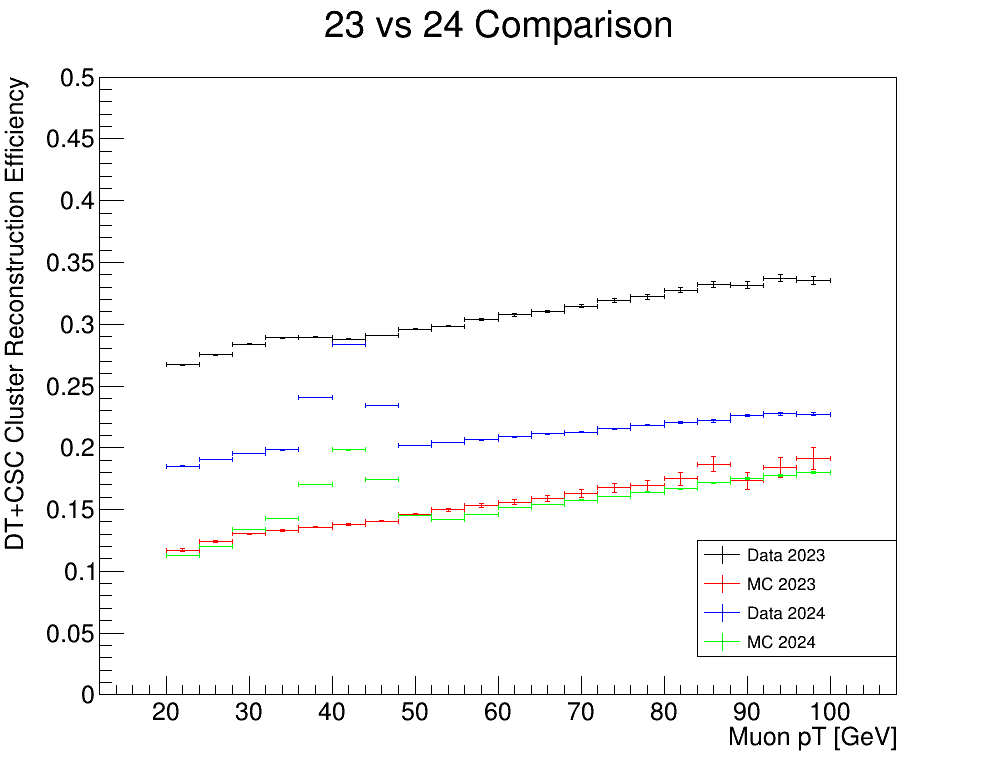

In [15]:
C = rt.TCanvas("c","c", 1000,800)
leg = rt.TLegend(0.7, 0.15, 0.9, 0.3)

Data_2023_Eff.SetLineColor(rt.kBlack)
Data_2023_Eff.SetTitle("23 vs 24 Comparison;Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
leg.AddEntry(Data_2023_Eff, "Data 2023", "lep")
Data_2023_Eff.Draw("E1")

MC_2023_Eff.SetLineColor(rt.kRed)
leg.AddEntry(MC_2023_Eff, "MC 2023", "lep")
MC_2023_Eff.Draw("E1 same")


Data_2024_Eff.SetLineColor(rt.kBlue)
leg.AddEntry(Data_2024_Eff, "Data 2024", "lep")
Data_2024_Eff.Draw("E1 same")

MC_2024_Eff.SetLineColor(rt.kGreen)
leg.AddEntry(MC_2024_Eff, "MC 2024", "lep")
MC_2024_Eff.Draw("E1 same")

leg.Draw("same")
C.Update()
C.Draw()
Data_2023_Eff.GetPaintedGraph().GetYaxis().SetRangeUser(0,0.5)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


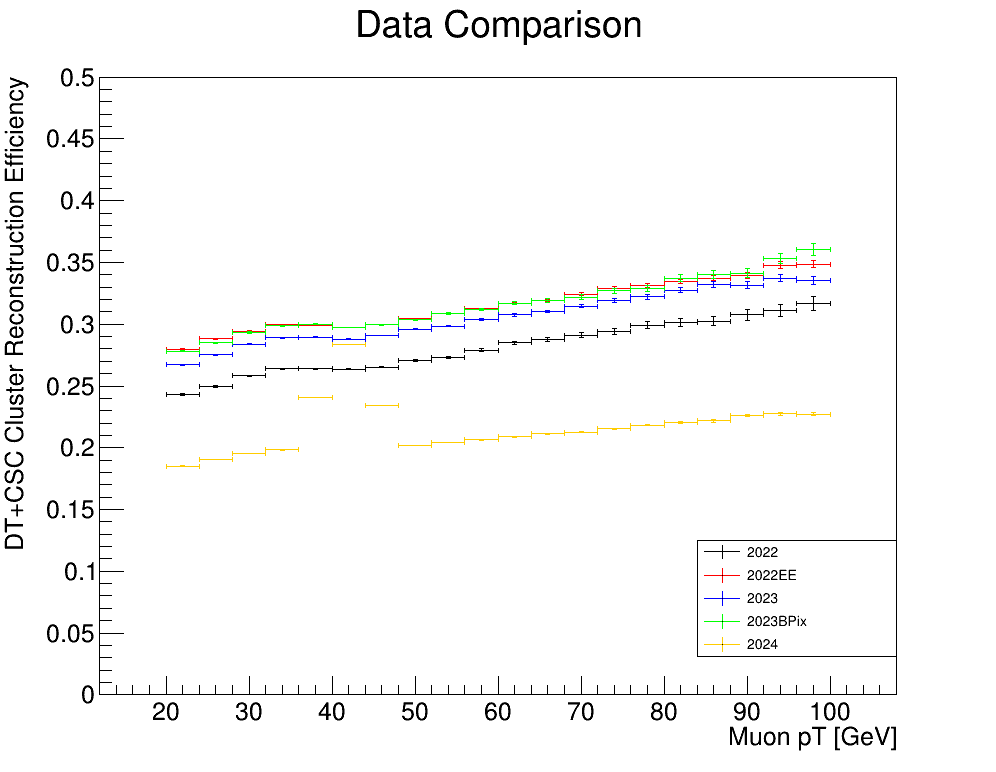

In [13]:
C = rt.TCanvas("c","c", 1000,800)
leg = rt.TLegend(0.7, 0.15, 0.9, 0.3)

Data_2022_Eff.SetLineColor(rt.kBlack)
leg.AddEntry(Data_2022_Eff, "2022", "lep")
Data_2022_Eff.SetTitle("Data Comparison;Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
Data_2022_Eff.Draw("E1")

Data_2022EE_Eff.SetLineColor(rt.kRed)
leg.AddEntry(Data_2022EE_Eff, "2022EE", "lep")
Data_2022EE_Eff.Draw("E1 same")

Data_2023_Eff.SetLineColor(rt.kBlue)
leg.AddEntry(Data_2023_Eff, "2023", "lep")
Data_2023_Eff.Draw("E1 same")

Data_2023BPix_Eff.SetLineColor(rt.kGreen)
leg.AddEntry(Data_2023BPix_Eff, "2023BPix", "lep")
Data_2023BPix_Eff.Draw("E1 same")

Data_2024_Eff.SetLineColor(rt.kOrange)
leg.AddEntry(Data_2024_Eff, "2024", "lep")
Data_2024_Eff.Draw("E1 same")

leg.Draw("same")
C.Update()
C.Draw()
Data_2022_Eff.GetPaintedGraph().GetYaxis().SetRangeUser(0,0.5)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


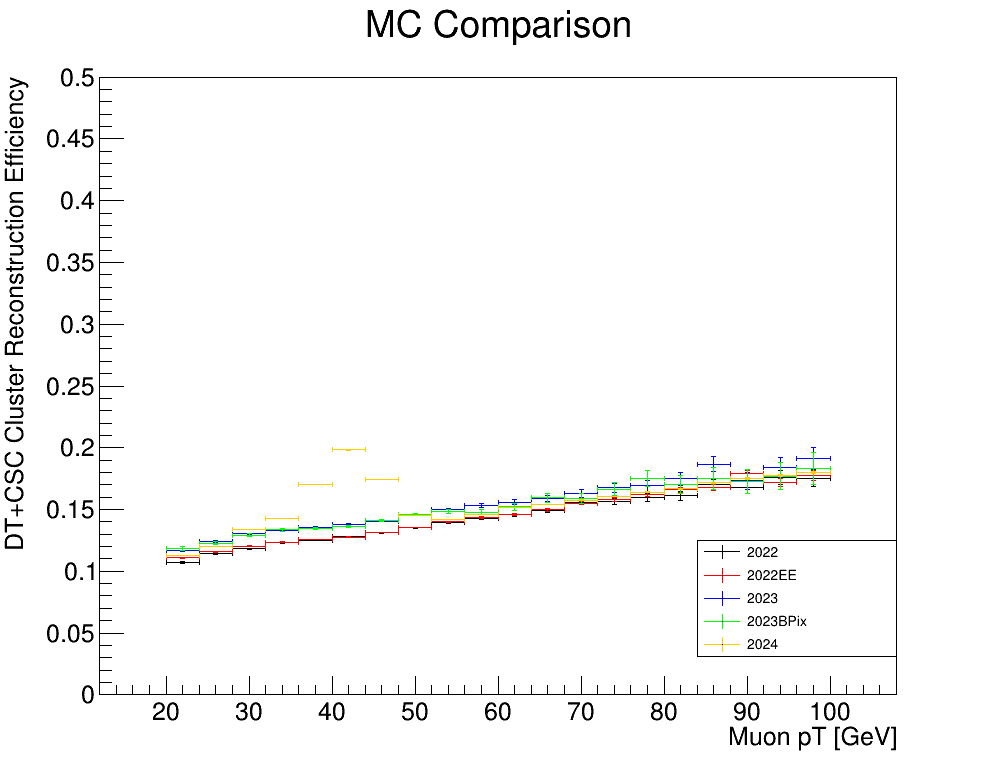

In [14]:
C = rt.TCanvas("c","c", 1000,800)
leg = rt.TLegend(0.7, 0.15, 0.9, 0.3)

MC_2022_Eff.SetLineColor(rt.kBlack)
leg.AddEntry(MC_2022_Eff, "2022", "lep")
MC_2022_Eff.SetTitle("MC Comparison;Muon pT [GeV];DT+CSC Cluster Reconstruction Efficiency")
MC_2022_Eff.Draw("E1")

MC_2022EE_Eff.SetLineColor(rt.kRed)
leg.AddEntry(MC_2022EE_Eff, "2022EE", "lep")
MC_2022EE_Eff.Draw("E1 same")

MC_2023_Eff.SetLineColor(rt.kBlue)
leg.AddEntry(MC_2023_Eff, "2023", "lep")
MC_2023_Eff.Draw("E1 same")

MC_2023BPix_Eff.SetLineColor(rt.kGreen)
leg.AddEntry(MC_2023BPix_Eff, "2023BPix", "lep")
MC_2023BPix_Eff.Draw("E1 same")

MC_2024_Eff.SetLineColor(rt.kOrange)
leg.AddEntry(MC_2024_Eff, "2024", "lep")
MC_2024_Eff.Draw("E1 same")

leg.Draw("same")
C.Update()
C.Draw()
MC_2022_Eff.GetPaintedGraph().GetYaxis().SetRangeUser(0,0.5)